In [1]:
import randomwalk as rw
import randomwalk_updated as rwu
import numpy as np
import matplotlib.pyplot as plt

# CW10 : Monte Carlo Techniques

The word "Monte Carlo" is a fancy term for what essentially means "using random numbers." Since computers are good at generating (pseudo)random numbers quickly, it can be advantageous to use this randomness for simulations. In this notebook, you will explore a few interesting examples of this idea.

## Estimating $\pi$
As a simple example, consider the following technique for computing the number $\pi$:
  - Area of a unit circle : $\pi$
  - Area of a the minimum box that fits the unit circle, with side length 2 : $4$
  - Fraction of area of the box taken up by the unit circle: $\pi/4$
  - Therefore: If one finds the fraction of random points that uniformly cover such a box that fall inside the unit circle, then multiplying this fraction by 4 will yield $\pi$.

Let's test this idea:

In [2]:
def estimate_pi(N=100000):
    # Generate N random x and y coordinates within the box with sides from [-2,2]
    xs = np.random.uniform(-1,1,N)
    ys = np.random.uniform(-1,1,N)
    # Count how many points lie within the unit circle
    circle = np.where(xs**2 + ys**2 < 1, 1, 0).sum()
    # Compute pi
    return 4 * circle / N

In [3]:
for N in [10, 100, 1000, 10000, 100000, 1000000, 10000000]:
    print("N=",N, " : pi=", estimate_pi(N))

N= 10  : pi= 4.0
N= 100  : pi= 3.32
N= 1000  : pi= 3.16
N= 10000  : pi= 3.1304
N= 100000  : pi= 3.13776
N= 1000000  : pi= 3.144072


N= 10000000  : pi= 3.1421968


Not bad for such a simple idea!

## Integrating a Function

Consider the following definition for integrating a function $f(x)$ between $x\in[a,b]$:

In [4]:
def estimate_integral(f,a,b,N=100000):
    xs = np.random.uniform(a,b,N)
    return f(xs).sum() * (b-a)/N

What does this do? It generates $N$ randomly chosen points $x_i$ in the range $[a,b]$, then finds the average function value of all those points $\bar{f} = \sum_{i=1}^N f(x_i)/N$, then multiplies this average value by the interval length to find the area: $A = \bar{f}*(b-a)$. This method relies upon the theorem in calculus that the integral is equal to the average value of the function over a domain times the domain itself (essentially approximating the whole integral as one big rectangle). Let's see how well it works in practice.

Recall that $\int_0^{2\pi}\sin(x)dx = 0$. Let's try to compute that using Monte Carlo methods:

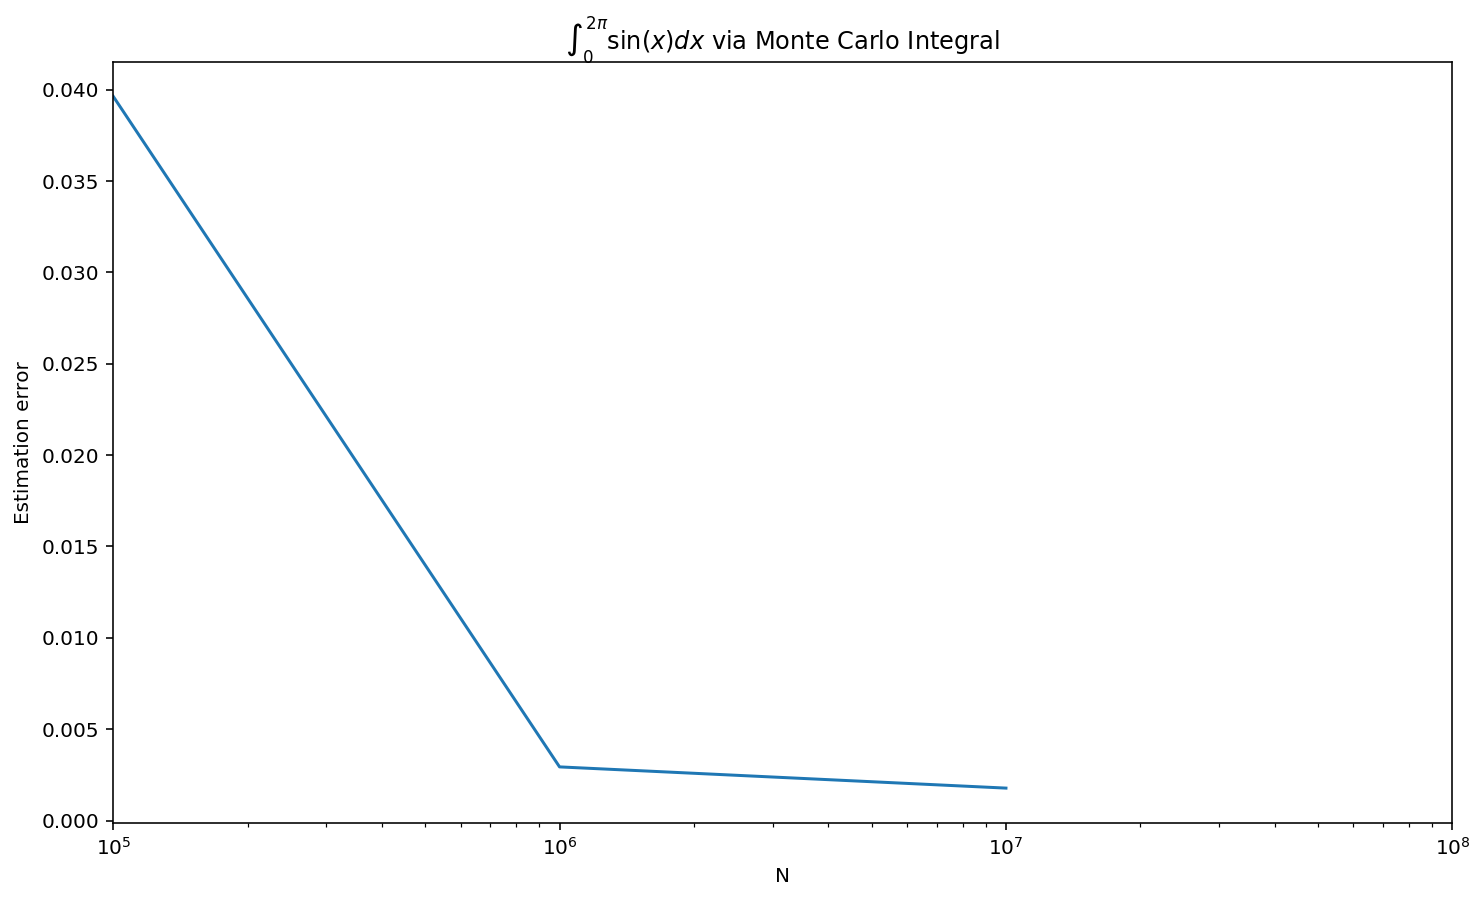

In [5]:
Ns = [10**i for i in range(5,8)]
Is = [estimate_integral(np.sin, 0, 2*np.pi, n) for n in Ns]
plt.semilogx(Ns,Is)
plt.title(r"$\int_0^{2\pi}\sin(x)dx$ via Monte Carlo Integral")
plt.xlabel("N")
plt.ylabel("Estimation error")
plt.xlim(10**5,10**8)
plt.show()

It does in fact converge eventually. Though this method is vastly less efficient than the trapezoid rule we have been using deterministically in 1D, it turns out that for higher dimensional integrals (like 10D) this stochastic technique can substantially outperform similar deterministic strategies.

## Random Walks

Where Monte Carlo methods really shine is in approximating behavior that is common in thermodynamics. For example, the air molecules in a room collide with each other constantly, effective jostling each other into random bits of short motion between collisions. Similarly, the molecules in a solid like a table vibrate and randomly exchange packets of energy as they essentially bump into each other - these packets of energy flow through the solid in the form of heat.

If we don't care much about the details of the motion, but want to capture the overall effects of the random jostling, we can simulate random walks of particles.

As a simple example, the following code places 100 particles at the origin of a 2D plane, then has them randomly walk around by taking integer steps in one of the four cardinal directions (E, W, N, S). The resulting animation shows their motion over time.

In [6]:
g = rw.walk_gen(walkers=100)

In [7]:
rw.plot_anim(g, xlim=(-50,50), ylim=(-50,50), max_frames=200)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAHFX21kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTQ4IHIyNjQzIDVjNjU3MDQgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE1IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9NiBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAAXtZYiE
ADP//vbsvgU1/Z/QlxEsxdpKcD4qpICAdzTAAAADAAADAAADAAChIqB7aCCkyPQAAAMAAToANSN/
gdr8wDZ7RXsYyyvROvU6+ALgHqY3ugAqpl/JGnQW2rCoyzZWclD+Q70VXLRcBfMvYivqY/vWD/QQ
AaWUg8hJhLPkher6TVHZv0HR8f1erxHF5mxCDbeTlNfUcXoKMayvKSA5AAAESY/FnlDFaxAXJfNg
QRjJI9cTLCnWv7/bU3GZBnKGTketJIUe0+zmuUtMveBgMTqBEKHHh57OpbiDe83TMc6SoQu3lwGB
DvOuA5OPFixV8pjwABYnXAEKAAADAAA0YpPUGSmHNb48FNxstJtqyvnh8vmuYUzHbiMNuUR8xWO4
CAbWTg/EnT4kvsRWaWUl+r3rrV+89MS5Af5g6bi7Hmnt5umu+lN3FpQKqAAAERkqF93Xa/l5Hmkq
567O5bCJ18E7F5c/qFfW7/Mmh8G6bbbOkadjobcbAAAasAAAAwAA+CwTvLcrxGpeK1i/Xn49OB/2
vPlPJJPtQSKEg29vgXee5r5jFNJ2XXrocjUPMJyyt2BaWecE26cUZsKO0CPgcXW7wtyqCyGvw0lt
weV2D8xbl/46YjawGq2+7vkuq+E5ba7jMXe+Y5tZenchYfn5ZiK+znVkCS7v0sz+QfXglQYseHbC
OQhpHbhbx9emFDKdmfUtqY2hZLR0tG+gB2Jjli8Dd7PsD1dw2QtKZwfC+0Ua5EgdoQtZpqsOUE9u
UB/ZrtxPU/RQIKOvo340W/3RXqmj9KVQDcv8KowMAA6JijRhPS8CKUvc7BaokSFrlMNNyEUlnhnw
X34eqdTExzAy+MTWRbn3Fj9jNWXN1c5oJCuHYIXs9MAAAAMAAARaaSm6o14hbzqPN58QnJj7IGBX
hiURmLCOg4xkR2JsNHXKrantPXXc8tkI4URJ2FnmS69+pQppzLuy1S+xcQd03ggdAN5EAATNtnPB
GTnje/0icD8GedBh8mWHsOP8diHOapSsrNzwW0bciRsviRqR94OlwXia2JBCwAAA7cAAAAMAAAMD
kuFM1gJ6+iNrA2233lHnQu4vfWzbbySxVPNRhcqQUfaxfoedDAADGPCt8L52ttXMcvTlJafPSeyE
xNnvgEtCYzyLQLX6meWwZ/jy7NuO4hgCfjs/MnRcpgFrenPRnDoAM2taBQ4bvtbenkLlSMYO/Dl1
It/mhEl5BTgtVmpKxbJepR5J3gb/VtzNlDwwgAAQEAB0MUyhxlxwmCL0tLPhzNF6ZK3/mrUO+V31
vusiE8mTx6m8gq/D5YfMbX39R6pa/9f/4PPELFvYrXW+hsugF9KuaKkOmGvV78QzNxkhTfCeZFsv
OjWB/9T3EEhwSDC/lTSk/09oPCZYWGadzZVAVyACmjJ7V7t7yRJJaG6S+6WdVWyeMrdCdwX5Mgso
HhU1OxsTAWZoZJ6wnH70mXv9tIABE08vxTP7O2s9i9aZVfoeDrePz/UCp3BZG5hNHXd75EpnlI1c
d4WTUxiVvzAdsbCQoK5FRbHI9P0TtRFUFh0YVVySThgDr2TWeBzNE4BudWFdq5gu+GrGtUW1wyeQ
Gqxx9Ya4TDdCali71YHAnVUi/KRm+SkltaEZ35OcZYv+l/x11PfrhLm6A5RVE3jgW8/2gSd4cm2r
Rmafn+XFS2XpFbF0nxy4Inz9yW4/5N42104hRTVbSV7le7icKudBWlE5VIvXaBwp4+OT1VaM87yV
polGi04+7LiiV8sfLKsAkHUjkHdokYzsRYKFqsJJzuLZsl1FBsD7Xf5/ebY4yA43TXqEw+UZStu+
XIDAUfFT3wbyhzYbih9r+ZbGTF2s2ANc9ZWprTThBtWPZoyD10JdsQUl5UfjDx4ZVPFXdJmrZZW9
bxD4QA7AbjK5hO5EXBGLAIUcPMBGy2iCRYYnjfQNWy76/H9/BQEV8LzuSBiWfS/0QD/XCOLu3WH+
OAvpdR16n6HT2ldcIr/In+iuHgAAFdaAAAADAAADA+8AAAJ9QZokbEM//p4QACG5JIxSATSCNshx
gsWzgAGHbH9Fafwub3qVKA0Rygbm+CHoKjQMUkMJcaYNxS7DMDfqAY/LK7MFOy/FOCMUccqKbC94
qgdDT6M4j50aSXeRBFFEGbJZWVhq+V9/uYjPYsseHBHurox5EGvHxGQPz8H3oQgTa6Ykqk7yoSH8
/KUZPMO4Nqd7OtpDnG7tSMcPf851QyI9pb7CLqUd4oQ66JgyaqEWuwAsWb5+AamJII/ZebM/MtLL
hvg/8aEoUkK+5tpQmKzFzzivB/y9+qkdSpaR9OF5rOt9l1go5fQntsxyW6DNkMt7WKpfQA3eD+DS
jF+URH0tAPRFad+kf9qMreGxavlbJXGtnJo+svDVPeIXRId157iZZgmol5udzbI9Ub6NhDRRf9Dt
Wmb06eLYPCWk8Z2kGkL3cnuHNrhF/MLvgpWfTmMw/nt5UxTtVYq9HU+W5/RiMSloQ71EOjIM7uIh
lFHJphgz+TEVewgKER72YsL6Gf9l7JBNTeycvS3GXjjkZRhe2Wfw2KiTP7yKZji77T314bF2eoO2
cqCdKwIdml3kQ9CtKQadG/1QiNvpcKbpBAC9E/zgR7nn/O0HYD5Lm2cwhn1UF8rkTyPHmZBVv9+j
Dr2orJdIt2gMd5FJXP0yVQEDHZKr/PYemtThZFnbCx7i3x1XZOivSJT/YmVkT4OKjvZSCu5YMXa6
7MEBq9gkioSu/POF5HTm2Kov/IbqVv6yxvKIfr2mg1pUC/sQXPENhFTFd+f9NNqfDeF+8Y833ITt
jNsALzphsTJt7EhKQEhfhu/rwqqOOVOYAC2b7TiFu/9AX0QH6Pe07Vyb3lOLgAAAAJhBnkJ4hH8A
CxKrVAAxmMU6gTVlxLdjO

## Exercise

Create a new random walk generator that prevents the particles from passing through a box with walls at $x=-20,20$ and $y=-20,20$.  To make things interesting, place a hole in your box at $x=20$ for the range $y\in[-4,4]$ such that particles can wander freely in that region of the hole as before.  Make sure particles outside the box and inside the box cannot move through the box walls, but otherwise move freely.  Modify the animation function so that the initialization frame draws the boundaries of your box in addition to the particles.

In [8]:
g = rwu.walk_gen(walkers=100)

In [9]:
rwu.plot_anim(g, xlim=(-30,30), ylim=(-30,30), max_frames=200)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAIsr21kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTQ4IHIyNjQzIDVjNjU3MDQgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE1IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9NiBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAAfJZYiE
ADP//vbsvgU1/Z/QlxEsxdpKcD4qpICAdzTAAAADAAADAAADAAChIqB7aCCkyPQAAAMAAToANZ7/
hNhVwAIvnus2IOjJeQBVRxjqlkhD7FOhu5ulx6ln9tpbd3BKK3v+TgsIx5PbFDloatDgm3yAaGVg
4LDCefGCM2YoGce7NgJYH0Fm4SNxu42CrvvBRERR4BCYcZLLwANY8SXTOikQjNbk/Eo+10SxKhGk
8lCpCsOXfim0UiyeGN5oAfOcq8hNA3Z7nSGZpMDmAAANoAAVR/O0wCcrIzv5/6XREY2zcj3KGZaJ
3lNtzqeqD5CfEOndHq5TodMjwTn9atTE/dxAi5e0orQa+SLhwPXj0QDBXmhRDr52Ik9Ben6kAT+Z
MZzKax7YRjUBhpkRjKqd+gptmHktHOCB1bsRh0G1mxETxHlnZLqAwpqqbdUTomBPF8F1I7CqkvEP
QS7GbDsHPEoUrp1eLFP6Qzv16E94kAGXSaRbUEjHgDuugAAAJ7ch1fAHZOix/Cj5+C9zLMwF2FUJ
i3lT3Icl3Q8YlD+dRORs9SPq2Y/EMqekrQ8OhqOE3e1O4bGcrZVeELmJuJdKff40dq+NIiz6tKDH
f19ey9/Aw/I1t7qbuILLP2SR/USDA4PIjMZB4nacPiJzQgAFgkIYAgIDXhAAPL1OsUkWElM4gGtO
0gNHIGKRaLlvAnJpvnqdQ0bI/9XtsPCoobiKntUYQgPUU53yjGKaTr9gpFH7H+HxszgVxsHyFm+S
n0dzjtAj4HJQV8lkSfyn84aS2Zqn6juS0Rgg4L4z1SOYYhXd3pcsWUgh+l6zbTG84s6Bb3xhlap5
mancuE7R/mdG/sLZMZ4iwg+hCeKMhEAKsyJHE91zJeV7WDRLve4SrzL+T0PqyrLokUaKTLkUXHxu
F/+MeawvfPdkQjqrR+56Pwlidp3+2Cs9Tq75v2DVJfjBjNO61mLNxM9CSdjJMHKcp9WM7w95d2h+
3EdVhXUqEo36heGrvAUcgyZbKwPACF5jYop6Q2UPBAYWaYAMWVSXYUHoni+PhawsB4zGhYBtzvD3
DUo2sGNAD153yueF2n1/fHhgvPoyuMR/lOgNk3Ri6LF++mZnqdJBIG7Y3BzE4WgFClF/9tRdBjsh
032k9COjls6O3lnLnuaKcZxBrzYYuA8xnbF3eCuWME7Uenana5kWYxzhbJ1uytws9if9NfI4oz6g
MQtEr4J5yxKxYFw5mNg8NifO8dBI8NYxdy0ELa+0WiZO2TpYjbjOi75bu2xo4WPuibRps/f9wI9y
J+yw7Rl3hAPrwAAAUYAAAAMAAASQ1DQXsNVfoohJMPf1e1JWfi7QabzzsH3PVj7sLJWVy9Xj+Lki
/PRWYgG+wGD74mtRrU2+hDt96fe5Y0zF1Kgj42iLe6cVJhso2Sd/tjvjN0TJ60AhceMjXYwm1gru
ql+snvqR0tLgdsVWFI+6x+A1bBBEZiQoyFcyGnX3OmB+kSGxP/F/Ih2IBMZ+RVYNkDDzx3jrL8/z
q2i5AcglGi65kQutRBcNw7xU5Qc0khV6i3STDmIAACQPUoCbMNgKWoDBeBJPvfMelNvnb+UCFXe6
Go91O48V8B+nXvE3pf+IGYLIH4Ha/IOU4//YLUlJFDAXkSvIXP54t88r/+RF19TyYaMlwil47AwD
Vqe8BuP/SkapLwgnqhy1bQmAUub+HpgzpKMkOIsj/VlcygJnZoPCC0g2v9PzYxAS+Mb/Sf8PUX+Q
XnrB2j0pBpaNG1irRoZupA2brFms1mpb8WHUg2hPCJt+YFHbyr72MUP0gvFJVwJ+bP+l6inYsI81
3qiCV2Dut6KGCRBu8O2Ehs2VKG/Wzfn9AbrBcvcdMns08k937yL1Bnpclk47kvAnv1W7fUNMsmQ0
oZ4hjonm0Ja4pCR06h2EH0XRGXGKns0/qZFIwTlqa+yHopouNp54wF2WsmbwHuO4cgABGVE8WL9d
JDbG4jiia5sAp/sv+wuJF8yeKiywSJ1T7+2KS/XE5sP7moeHZArpkVUDHC8GsOpdGO9NmU3gXlMH
TBLazLmuRwXCL0Hqw5vRVX9hcdd2Qn54hd6MAQ5sbWPRkWKd2UaEjSlyvPsaYCOdXxYaMteu/ACv
6xuXc/wG+yM3zGbigpPqWIc/KxnS88NIt0m+zF6i6cggPDSaDU8F5nWxqv/TmiPokU1JsxEoRkHV
81Buk4WeH64m7UTVH7b+wh6l31v03OeyGrYe+wkR9jOXZ+R78E7urIH8o0zEJRoBeW0auUY0jbVy
BOi3A6lMhFC9t4yHxndjw1gHlHvpAzFJsxEnplgFyuihgdd3B3ckTTKZ4Tq5Se/u3k7T3sp8TVtd
oYinaBmDcOemL3bvtLAlQpCK9v7aAhqYzjW2XwaCVuf/kcjnT2DCbroewa9cZSoWfFzzOrIlQ1b1
/BL/On5lEOYIRn/iY2DDcURZvmt5sz6eSdc5fg/rAibCO58YYGP6NG/aZISdZkDg8n49wfwxcK7r
SZ+s4gqj5X2UJxce5fc+VczRF3iiQwxSOHGb9b+f2kAAUZxyQL3lDhGUoMBOiwxXMZKYJOdw2fMT
oTtWWx1Njd357QW73gTXCvPbtfanssBOD1yLeZZ2aUOhEfQCSBOgACSAAAADAAADAABfQQAAA35B
miRsQz/+nhAAZGq0ACfz/0ECgoVbarSt7vyzJisNaOH8USSYoI3kXw4PXB/0a7rIyBE1W4fTNKEi
7JdNPn8i3se/V+wudQI/5Cs/QDpV08HoQ4XxovzFe02C2pzHObbvHKSeu7JlO2Nc5KVAtTILFcVV
sNzs8460iNgUWjA0y0dzL8rG+s3csc0KsTHyxNorqNWm8eLq2a1MDRxy7ww2Vtx9fQwMi1Az28NI
biKuxfKkk1q7Dvsa1KN1j

## Estimating $e$

In [10]:
def estimate_e(N=100000):
    xs = np.random.uniform(0,1,N)
    return np.exp(xs).sum()/N +1

In [11]:
for N in [10, 100, 1000, 10000, 100000, 1000000, 10000000]:
    print("N =",N, " : e =", estimate_e(N))
    
print("Exact: ",np.e)

N = 10  : e = 2.52125639003
N = 100  : e = 2.72726693269
N = 1000  : e = 2.70934582875
N = 10000  : e = 2.71337523543
N = 100000  : e = 2.71687945524
N = 1000000  : e = 2.71854871031


N = 10000000  : e = 2.71817748214
Exact:  2.718281828459045
